In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
# Get a list of all files which are .csv files in ../DOTSSimulator/Assets/SimulationResults
import os
files = [f for f in os.listdir('.') if f.endswith('.csv')]
# Sort the files descending
files.sort(reverse=True)

print(f'Found {len(files)} files')
print(f'Newest file: {files[0]}')

result_file_path = f'{files[0]}'

Found 1 files
Newest file: 2023-06-27-12-30-58.csv


In [3]:
results_df: pd.DataFrame = pd.read_csv(result_file_path)
# Print basic information about the dataframe
print(results_df.info())

results_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Step                727 non-null    int64  
 1   TimeStamp           727 non-null    float64
 2   AvgEnergy           727 non-null    int64  
 3   NoBoids             727 non-null    int64  
 4   NoFoodSources       727 non-null    int64  
 5   TotalFoodAvailable  727 non-null    float64
 6   Polarization        0 non-null      float64
 7   Expanse             0 non-null      float64
dtypes: float64(4), int64(4)
memory usage: 45.6 KB
None


,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.00200,0,0,1,0.091008,NaN,NaN
1,1,30.00002,0,0,1,2.816702,NaN,NaN
2,2,60.00006,0,0,1,5.542397,NaN,NaN
3,3,90.00011,0,0,1,8.268091,NaN,NaN
4,4,119.99920,0,0,1,10.992270,NaN,NaN


In [4]:
# Configuration:

truncated_df = results_df.iloc[:721]

print(truncated_df.describe())

truncated_df.head()

            Step     TimeStamp  AvgEnergy  NoBoids  NoFoodSources  \
count  721.00000    721.000000      721.0    721.0          721.0   
mean   360.00000  10800.552879        0.0      0.0            1.0   
std    208.27906   6248.791844        0.0      0.0            0.0   
min      0.00000      0.002000        0.0      0.0            1.0   
25%    180.00000   5400.000000        0.0      0.0            1.0   
50%    360.00000  10800.460000        0.0      0.0            1.0   
75%    540.00000  16201.070000        0.0      0.0            1.0   
max    720.00000  21601.070000        0.0      0.0            1.0   

       TotalFoodAvailable  Polarization  Expanse  
count          721.000000           0.0      0.0  
mean           981.339555           NaN      NaN  
std            567.704997           NaN      NaN  
min              0.091008           NaN      NaN  
25%            490.714500           NaN      NaN  
50%            981.339500           NaN      NaN  
75%           1471.96

,Step,TimeStamp,AvgEnergy,NoBoids,NoFoodSources,TotalFoodAvailable,Polarization,Expanse
0,0,0.00200,0,0,1,0.091008,NaN,NaN
1,1,30.00002,0,0,1,2.816702,NaN,NaN
2,2,60.00006,0,0,1,5.542397,NaN,NaN
3,3,90.00011,0,0,1,8.268091,NaN,NaN
4,4,119.99920,0,0,1,10.992270,NaN,NaN


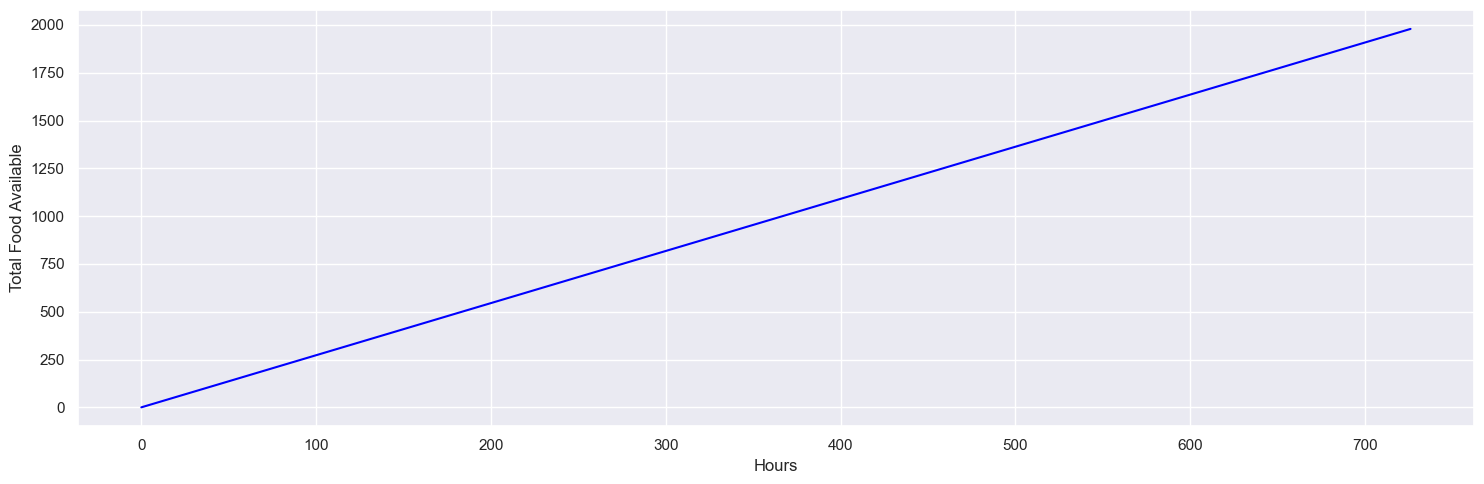

In [9]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot()
sns.lineplot(data=results_df, x='Step', y='TotalFoodAvailable', color='blue', ax=ax)
plt.xlabel('Hours')
plt.ylabel('Total Food Available')
plt.tight_layout()
 
plt.savefig('plots/exp2-TotalFoodAvailable.pdf')

In [8]:
# Compute coefficient in avg energy
min_energy = truncated_df['TotalFoodAvailable'].min()
max_energy = truncated_df['TotalFoodAvailable'].max()
print(f'Min food available: {min_energy}')
print(f'Max food available: {max_energy}')
print(f'Coefficient: {(max_energy - min_energy) / 30}')

Min food available: 0.09100791
Max food available: 1962.589
Coefficient: 65.41659973633334
